In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-choices/food_coded.csv
/kaggle/input/food-choices/codebook_food.docx


In [2]:
df_ = pd.read_csv("/kaggle/input/food-choices/food_coded.csv")
df = df_.copy()

In [3]:
import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: int = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame."""
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)
        df_missing.iat[row_idx, col_idx] = np.nan

    return df_missing

df = add_random_missing_values(dataframe=df, missing_rate=0.03)


In [4]:
df.head(n = 3)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2.0,1.0,430.0,NaN,315.0,1.0,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345.0,car racing,5.0,1.0,1315.0,187
1,3.654,1.0,1.0,610.0,3.0,420.0,2.0,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690.0,Basketball,4.0,2.0,900.0,155
2,3.3,1.0,1.0,720.0,4.0,420.0,2.0,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500.0,none,5.0,1.0,900.0,I'm not answering this.


In [5]:
# İlk 3 gözlem
print(df.head(3))

# Son 3 gözlem
print(df.tail(3))

     GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4     2.0        1.0             430.0           NaN           315.0   
1  3.654     1.0        1.0             610.0           3.0           420.0   
2    3.3     1.0        1.0             720.0           4.0           420.0   

   coffee                     comfort_food   comfort_food_reasons  \
0     1.0                             none  we dont have comfort    
1     2.0      chocolate, chips, ice cream   Stress, bored, anger   
2     2.0  frozen yogurt, pizza, fast food        stress, sadness   

   comfort_food_reasons_coded  ...  soup  sports  thai_food tortilla_calories  \
0                         9.0  ...   1.0     1.0          1            1165.0   
1                         1.0  ...   1.0     1.0          2             725.0   
2                         1.0  ...   1.0     2.0          5            1165.0   

   turkey_calories  type_sports veggies_day  vitamins  waffle_calories  \
0      

In [6]:
# Veri setinin boyutu
print(f"Veri seti {df.shape[0]} satır ve {df.shape[1]} sütun içeriyor.")

Veri seti 125 satır ve 61 sütun içeriyor.


In [7]:
# Tüm kolonlar
print("Kolonlar:", list(df.columns))

# Toplam kolon sayısı
print(f"Toplam {len(df.columns)} kolon bulunmaktadır.")

Kolonlar: ['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day', 'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1', 'cuisine', 'diet_current', 'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'father_profession', 'fav_cuisine', 'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal', 'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 'meals_dinner_friend', 'mother_education', 'mother_profession', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day', 'vitamins', 'waffle_calo

In [8]:
# Veri setinin özet bilgisi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           118 non-null    object 
 1   Gender                        123 non-null    float64
 2   breakfast                     122 non-null    float64
 3   calories_chicken              117 non-null    float64
 4   calories_day                  100 non-null    float64
 5   calories_scone                119 non-null    float64
 6   coffee                        120 non-null    float64
 7   comfort_food                  121 non-null    object 
 8   comfort_food_reasons          120 non-null    object 
 9   comfort_food_reasons_coded    102 non-null    float64
 10  cook                          116 non-null    float64
 11  comfort_food_reasons_coded.1  124 non-null    float64
 12  cuisine                       105 non-null    float64
 13  diet_

In [9]:
# Tür bilgisi
print(df.dtypes)

GPA                  object
Gender              float64
breakfast           float64
calories_chicken    float64
calories_day        float64
                     ...   
type_sports          object
veggies_day         float64
vitamins            float64
waffle_calories     float64
weight               object
Length: 61, dtype: object


In [10]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype.name == "category"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['GPA', 'comfort_food', 'comfort_food_reasons', 'diet_current', 'eating_changes', 'father_profession', 'fav_cuisine', 'food_childhood', 'healthy_meal', 'ideal_diet', 'meals_dinner_friend', 'mother_profession', 'type_sports', 'weight']
Numerical Features: ['Gender', 'breakfast', 'calories_chicken', 'calories_day', 'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded', 'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 'mother_education', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calorie

In [11]:
for col in categorical_features:
    df[col] = pd.Categorical(df[col])

In [12]:
print(df.describe().T)

                              count         mean         std    min    25%  \
Gender                        123.0     1.390244    0.489800    1.0    1.0   
breakfast                     122.0     1.114754    0.320039    1.0    1.0   
calories_chicken              117.0   576.880342  131.522462  265.0  430.0   
calories_day                  100.0     3.040000    0.634369    2.0    3.0   
calories_scone                119.0   511.470588  233.372795  315.0  420.0   
coffee                        120.0     1.758333    0.429888    1.0    2.0   
comfort_food_reasons_coded    102.0     2.735294    1.999636    1.0    2.0   
cook                          116.0     2.793103    1.059263    1.0    2.0   
comfort_food_reasons_coded.1  124.0     2.693548    1.917728    1.0    2.0   
cuisine                       105.0     1.400000    0.986447    1.0    1.0   
diet_current_coded            122.0     1.770492    0.769103    1.0    1.0   
drink                         115.0     1.539130    0.500648    

In [13]:
print(df.describe(include="all").T)


                  count unique   top freq         mean         std    min  \
GPA                 118     37     3   11          NaN         NaN    NaN   
Gender            123.0    NaN   NaN  NaN     1.390244      0.4898    1.0   
breakfast         122.0    NaN   NaN  NaN     1.114754    0.320039    1.0   
calories_chicken  117.0    NaN   NaN  NaN   576.880342  131.522462  265.0   
calories_day      100.0    NaN   NaN  NaN         3.04    0.634369    2.0   
...                 ...    ...   ...  ...          ...         ...    ...   
type_sports          95     64  none    8          NaN         NaN    NaN   
veggies_day       123.0    NaN   NaN  NaN          4.0    1.086429    1.0   
vitamins          123.0    NaN   NaN  NaN     1.520325     0.50163    1.0   
waffle_calories   120.0    NaN   NaN  NaN  1076.416667  246.678935  575.0   
weight              121     47   140    8          NaN         NaN    NaN   

                    25%     50%     75%     max  
GPA                 NaN  

In [14]:
print(df.describe(include="all").T)

                  count unique   top freq         mean         std    min  \
GPA                 118     37     3   11          NaN         NaN    NaN   
Gender            123.0    NaN   NaN  NaN     1.390244      0.4898    1.0   
breakfast         122.0    NaN   NaN  NaN     1.114754    0.320039    1.0   
calories_chicken  117.0    NaN   NaN  NaN   576.880342  131.522462  265.0   
calories_day      100.0    NaN   NaN  NaN         3.04    0.634369    2.0   
...                 ...    ...   ...  ...          ...         ...    ...   
type_sports          95     64  none    8          NaN         NaN    NaN   
veggies_day       123.0    NaN   NaN  NaN          4.0    1.086429    1.0   
vitamins          123.0    NaN   NaN  NaN     1.520325     0.50163    1.0   
waffle_calories   120.0    NaN   NaN  NaN  1076.416667  246.678935  575.0   
weight              121     47   140    8          NaN         NaN    NaN   

                    25%     50%     75%     max  
GPA                 NaN  

## Eksik Veri Amalizi

In [15]:
# Eksik değerlerin sayısı
print("Her bir değişken için eksik değer sayısı:")
print(df.isna().sum())

# Eksik olmayan değerlerin toplamı
print("\nEksik olmayan değerlerin toplam sayısı:")
print(df.notnull().sum())

# Veri setinde toplam eksik ve eksik olmayan değerlerin sayısı
total_notnull = df.notnull().sum().sum()
total_isnull = df.isna().sum().sum()

print(f"\nVeri seti içerisinde toplam {total_notnull} adet eksik olmayan, {total_isnull} eksik gözlem var.")

Her bir değişken için eksik değer sayısı:
GPA                  7
Gender               2
breakfast            3
calories_chicken     8
calories_day        25
                    ..
type_sports         30
veggies_day          2
vitamins             2
waffle_calories      5
weight               4
Length: 61, dtype: int64

Eksik olmayan değerlerin toplam sayısı:
GPA                 118
Gender              123
breakfast           122
calories_chicken    117
calories_day        100
                   ... 
type_sports          95
veggies_day         123
vitamins            123
waffle_calories     120
weight              121
Length: 61, dtype: int64

Veri seti içerisinde toplam 7253 adet eksik olmayan, 372 eksik gözlem var.


In [16]:
# Eksik değer oranı
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nEksik değer oranı (yüzde):")
print(missing_percentage)


Eksik değer oranı (yüzde):
GPA                  5.6
Gender               1.6
breakfast            2.4
calories_chicken     6.4
calories_day        20.0
                    ... 
type_sports         24.0
veggies_day          1.6
vitamins             1.6
waffle_calories      4.0
weight               3.2
Length: 61, dtype: float64


<Axes: >

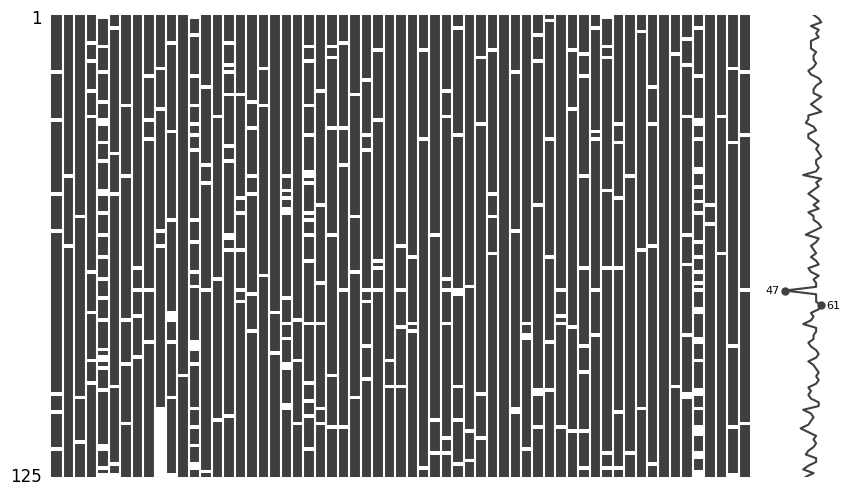

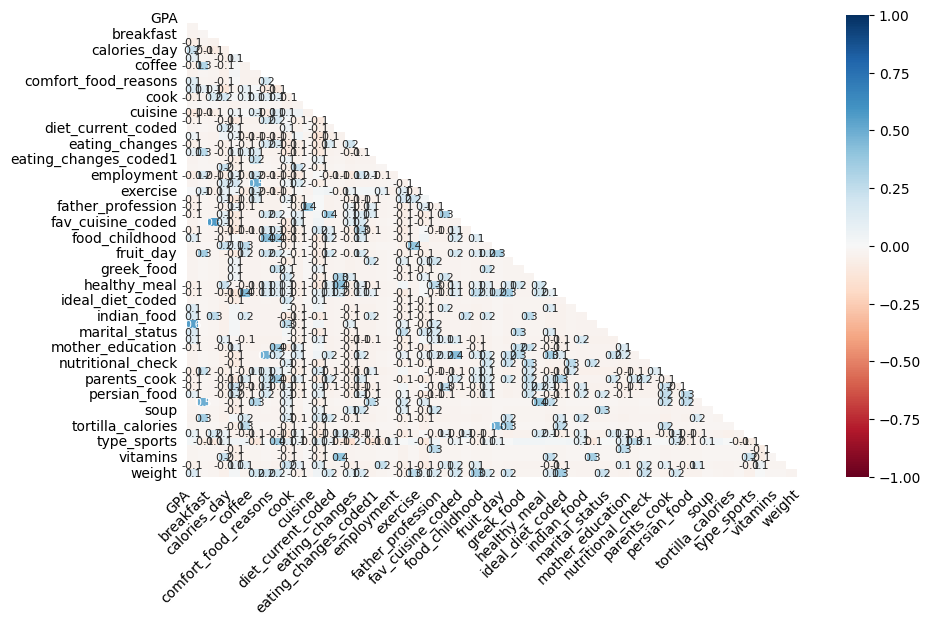

In [17]:
# missingno kütüphanesini yükleme
!pip install missingno

import missingno as msno

# Eksik değer matrisi
msno.matrix(df, figsize=(10, 6), fontsize=10)

# Eksik değerlerin heatmap'i
msno.heatmap(df, figsize=(10, 6), fontsize=10)

In [18]:
df_dropped_rows = df.dropna()
print("\nEksik değerlerin bulunduğu satırlar silindi. yeni boyutlar:")
print(df_dropped_rows.shape)


Eksik değerlerin bulunduğu satırlar silindi. yeni boyutlar:
(8, 61)


In [19]:
df_dropped_columns = df.dropna(axis=1)
print("\nEksik değerlerin bulunduğu kolonlar silindi. Yeni boyutlar:")
print(df_dropped_columns.shape)


Eksik değerlerin bulunduğu kolonlar silindi. Yeni boyutlar:
(125, 2)


In [20]:
print("Veri setindeki kolonlar:")
print(df.columns)

Veri setindeki kolonlar:
Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'spor

In [21]:
# Eksik değerlerin sayısını kontrol edelim
print("calories_day sütunundaki eksik değerlerin sayısı:")
print(df['calories_day'].isna().sum())

calories_day sütunundaki eksik değerlerin sayısı:
25


In [22]:
# Ortalama ile dolduralım
mean_calories = df['calories_day'].mean()
df['calories_day'] = df['calories_day'].fillna(value=mean_calories)

# Eksik değerlerin sayısını tekrar kontrol edelim
print("\nDoldurma işleminden sonra calories_day sütunundaki eksik değerler:")
print(df['calories_day'].isna().sum())


Doldurma işleminden sonra calories_day sütunundaki eksik değerler:
0


In [23]:
# Eksik değerlerin doldurulduğunu kontrol edelim
print(f"Doldurma işleminden sonra 'calories_day' sütunundaki eksik değerler:\n{df['calories_day'].isna().sum()}")

Doldurma işleminden sonra 'calories_day' sütunundaki eksik değerler:
0


In [24]:
# Eksik değerlerin toplamını kontrol edelim
print("\nEksik değerlerin toplamı (doldurma işleminden sonra):")
print(df.isna().sum())


Eksik değerlerin toplamı (doldurma işleminden sonra):
GPA                  7
Gender               2
breakfast            3
calories_chicken     8
calories_day         0
                    ..
type_sports         30
veggies_day          2
vitamins             2
waffle_calories      5
weight               4
Length: 61, dtype: int64


### Eksik Veri Analizi: Sayısal Değişkenlerin Doldurulması- Verisetinde eksik değerler tespit edildi ve sayısal sütunlar analiz edildi.- Eksik değerlerin doldurulması iç **ortalama de ** kullanıldı
- Bu yöntem, verisetindeki bilgi kaybını minimuma indirirken, dağılımların manipüle edilmesini önlemek için tercih edilmişir.


## Kategorik Değişken Analiz

In [25]:
# Kategorik değişkenleri seçelim
df_categorical = df.select_dtypes(include="object")
print("İlk 3 gözlem:")
print(df_categorical.head(3))

İlk 3 gözlem:
Empty DataFrame
Columns: []
Index: [0, 1, 2]


In [26]:
# Her bir kategorik değişken için benzersiz değerleri gözlemleyelim
for col in df_categorical.columns:
    unique_values = df_categorical[col].unique()
    print(f"{col} değişkenindeki benzersiz değerler:\n{unique_values}\n")

In [27]:
# Benzersiz değerlerin sayısını bulalım
for col in df_categorical.columns:
    print(f'"{col}" değişkeninde toplam {df_categorical[col].nunique()} benzersiz değer var.\n')

In [28]:
# Benzersiz değerlerin sayısını bulalım
for col in df_categorical.columns:
    print(f'"{col}" değişkeninde toplam {df_categorical[col].nunique()} benzersiz değer var.\n')

In [29]:
# Kategorik değişkenleri seçelim
df_categorical = df.select_dtypes(include="object")

# İlk birkaç gözlemi kontrol edelim
print("İlk 3 gözlem:")
print(df_categorical.head(3))

# Kategorik değişkenler:
print("\nKategorik değişkenler:")
print(df_categorical.columns.tolist())

İlk 3 gözlem:
Empty DataFrame
Columns: []
Index: [0, 1, 2]

Kategorik değişkenler:
[]


) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


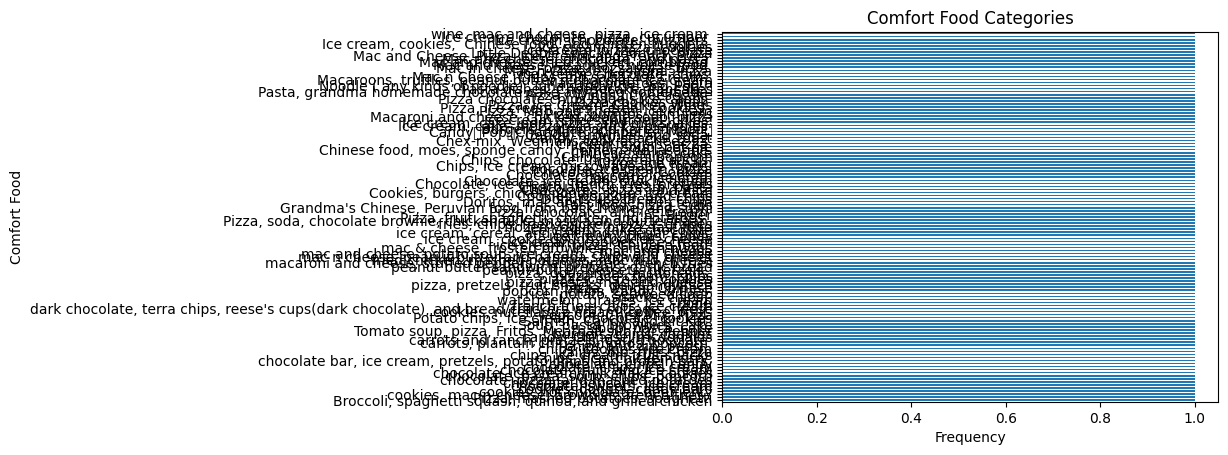

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# DejaVu Sans fontunu kullan
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# comfort_food değişkenindeki değerleri görselleştirelim
df['comfort_food'].value_counts().plot.barh()
plt.title('Comfort Food Categories')
plt.xlabel('Frequency')
plt.ylabel('Comfort Food')
plt.show()

In [31]:
print("Comfort Food Categories".encode('utf-8'))

b'Comfort Food Categories'
